<a href="https://colab.research.google.com/github/cansuyildirimmm/Customer-Churn-Analysis/blob/main/churn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
import os

dataset_path = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
import pandas as pd

# CSV dosyasını indirip aynı klasöre koyduğunu varsayıyoruz
df = pd.read_csv(dataset_path)

# Genel bilgi
print(df.shape)
print(df['Churn'].value_counts())


(7043, 21)
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


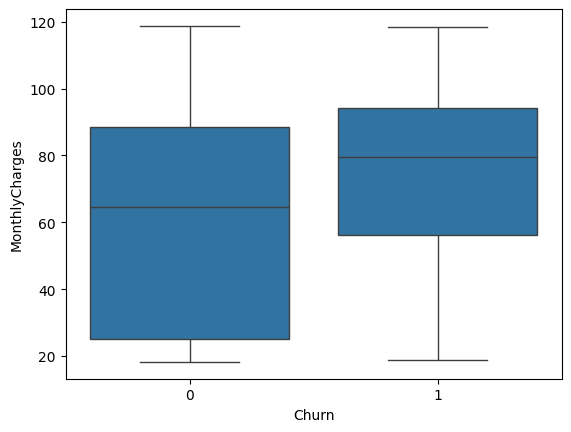

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#eksik veya hatalı verileri kontrol et
print(df.isnull().sum())

#"TotalCharges" sayısala çevrilmeli
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

#kategorik sütunları sayıya çevir(Label Encoding)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
  if col !='customerID':
    df[col]=le.fit_transform(df[col])

#EDA: Aylık ücret vs Churn
sns.boxplot(x='Churn',y='MonthlyCharges', data=df)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#özellikler ve hedef
X=df.drop(['customerID', 'Churn'], axis=1)
Y=df['Churn']

In [ ]:
#eğitim-test bölümü
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)



In [ ]:
#model oluştur ve eğit
model= RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#tahmin ve değerlendirme
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.48      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.78      2110

[[1384  165]
 [ 289  272]]


In [ ]:
#smote ile dengeleme
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [ ]:
X=df.drop(['customerID', 'Churn'], axis=1)
Y=df['Churn']

#eğitim ve test bölme
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
#SMOTE ile sınıf dengesini düzelt
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
#GridSearchCV ile RandomForest Hiperparametre Ayarı
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=3, scoring='f1')
grid.fit(X_train_smote, Y_train_smote)

best_model = grid.best_estimator_


In [ ]:
#değerlendirme
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = best_model.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1549
           1       0.56      0.67      0.61       561

    accuracy                           0.77      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.77      0.78      2110

[[1251  298]
 [ 187  374]]


In [ ]:
#önemli özelliklerin görselleştirilmesi
#amaç:modelin karar verirken hangi sütunlara daha çok önem verdiğini görmek
importances=best_model.feature_importances_
features = X.columns

In [ ]:
#önem sırasına göre sırala
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

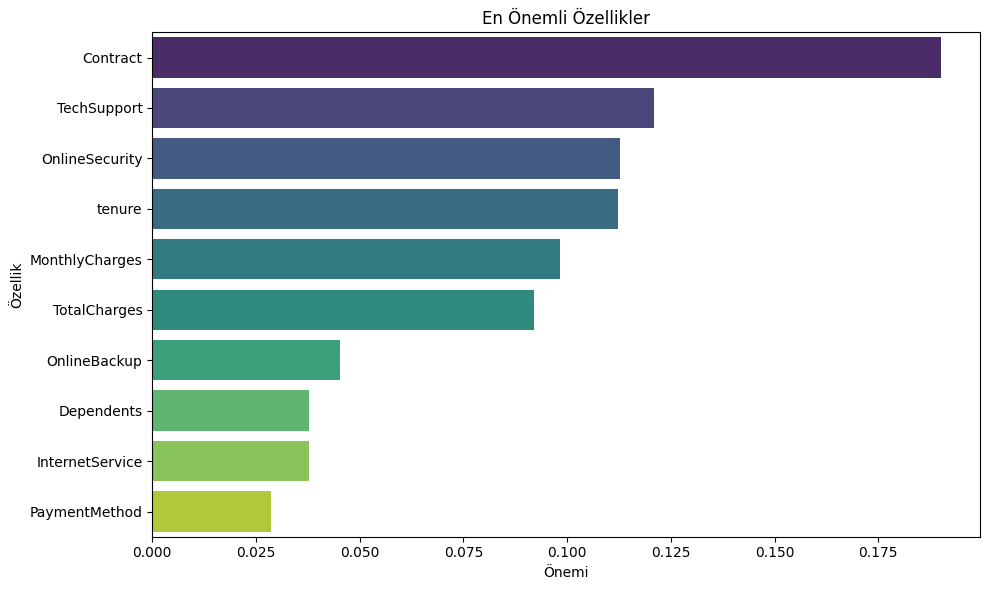

In [31]:
#görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance.head(10),
    x='Importance',
    y='Feature',
    hue='Feature',
    palette='viridis',
    legend=False
)
plt.title('En Önemli Özellikler')
plt.xlabel('Önemi')
plt.ylabel('Özellik')
plt.tight_layout()
plt.show()
